# Loan Approval Prediction using KNN, Logistic Regression and Random Forest

The purpose of this project is to develop and assess 3 machine learning models—KNN, Logistic Regression, and Random Forest—to predict loan approval outcomes using borrower-related features, and to compare their predictive performance.
<br>
Group Members :  Zihua Lai (437849) and  Zeping Chen (476917)

The dataset used for this project is the **Loan Approval Classification Dataset** from kaggle https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data?resource=download

In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Load data into a pandas dataframe

In [133]:
path_to_dataset = "data/loan_data.csv"
df = pd.read_csv(path_to_dataset)
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


### Variable Description

person_age Applicant's age Float; <br>
person_gender Applicant's gender Categorical; <br>
person_education Applicant's highest level of education; <br>
Categorical person_income Applicant's annual income in currency Float; <br>
person_emp_exp Years of employment experience Integer; <br>
person_home_ownership Home ownership status (e.g., rent, own, mortgage) Categorical; <br>
loan_amnt Amount of loan requested Float; <br>
loan_intent Intended purpose of the loan (e.g., personal, education) Categorical; <br>
loan_int_rate Interest rate applicable to the loan Float; <br>
loan_percent_income Loan amount as a percentage of annual income Float; <br>
cb_person_cred_hist_length Number of years of credit history Float; <br>
credit_score Applicant's credit score Integer; <br>
previous_loan_defaults_on_file Indicator of previous loan defaults (Yes/No) Categorical; <br>
loan_status Loan status outcome (1 = approved, 0 = rejected) Integer <br>

See the number of data

In [134]:
df.shape

(45000, 14)

Check if the data contain miss values

In [135]:
df.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

Check if there is any duplication in the data

In [136]:
df.duplicated().sum()

np.int64(0)

Display the summary statistics of the data

In [137]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


## Explainatory Data Analysis

First let's take a look at the distribution of the target variable for classification

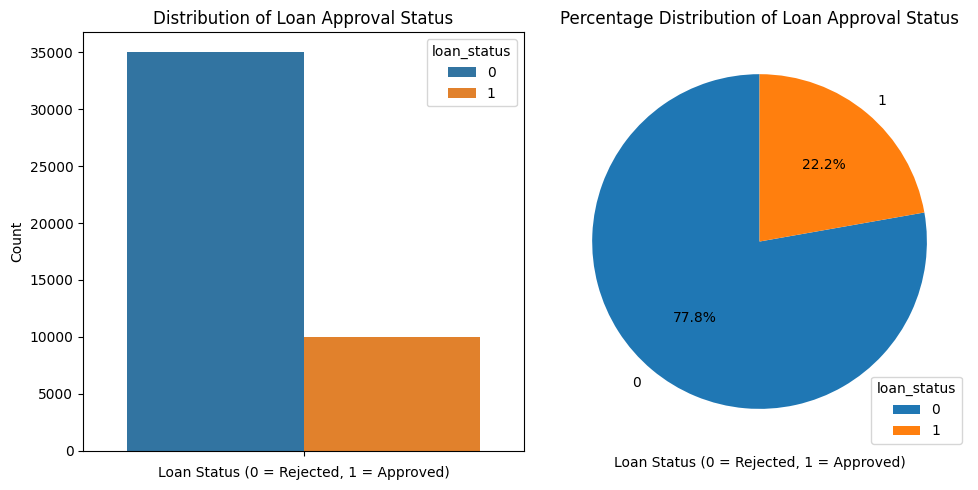

In [138]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
loan_status_counts = df['loan_status'].value_counts()

sns.barplot(y=df['loan_status'].value_counts(), hue=df['loan_status'].value_counts().index, ax=axes[0], palette="tab10")
axes[0].set_title('Distribution of Loan Approval Status')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Loan Status (0 = Rejected, 1 = Approved)')

axes[1].pie(
    df['loan_status'].value_counts(),
    labels=df['loan_status'].value_counts().index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('tab10')
)
axes[1].legend(
    df['loan_status'].value_counts().index,
    title="loan_status",
    loc="lower right",
)
axes[1].set_title('Percentage Distribution of Loan Approval Status')
axes[1].set_xlabel('Loan Status (0 = Rejected, 1 = Approved)')

plt.tight_layout()
plt.show()

The insights from the loan status distribution visualization:

The count annotations on top of each bar provide a clear view of the actual number of records in each category, highlighting any imbalance in the dataset.
This visualization suggests a higher count of rejected loans compared to approved ones, which may indicate a class imbalance that should be addressed when building predictive models.
The pie chart illustrates the percentage distribution of loan approval status, offering a complementary view of the relative proportions of approvals and rejections.

### Univariate Analysis for Numerical Vars  -- Histogram

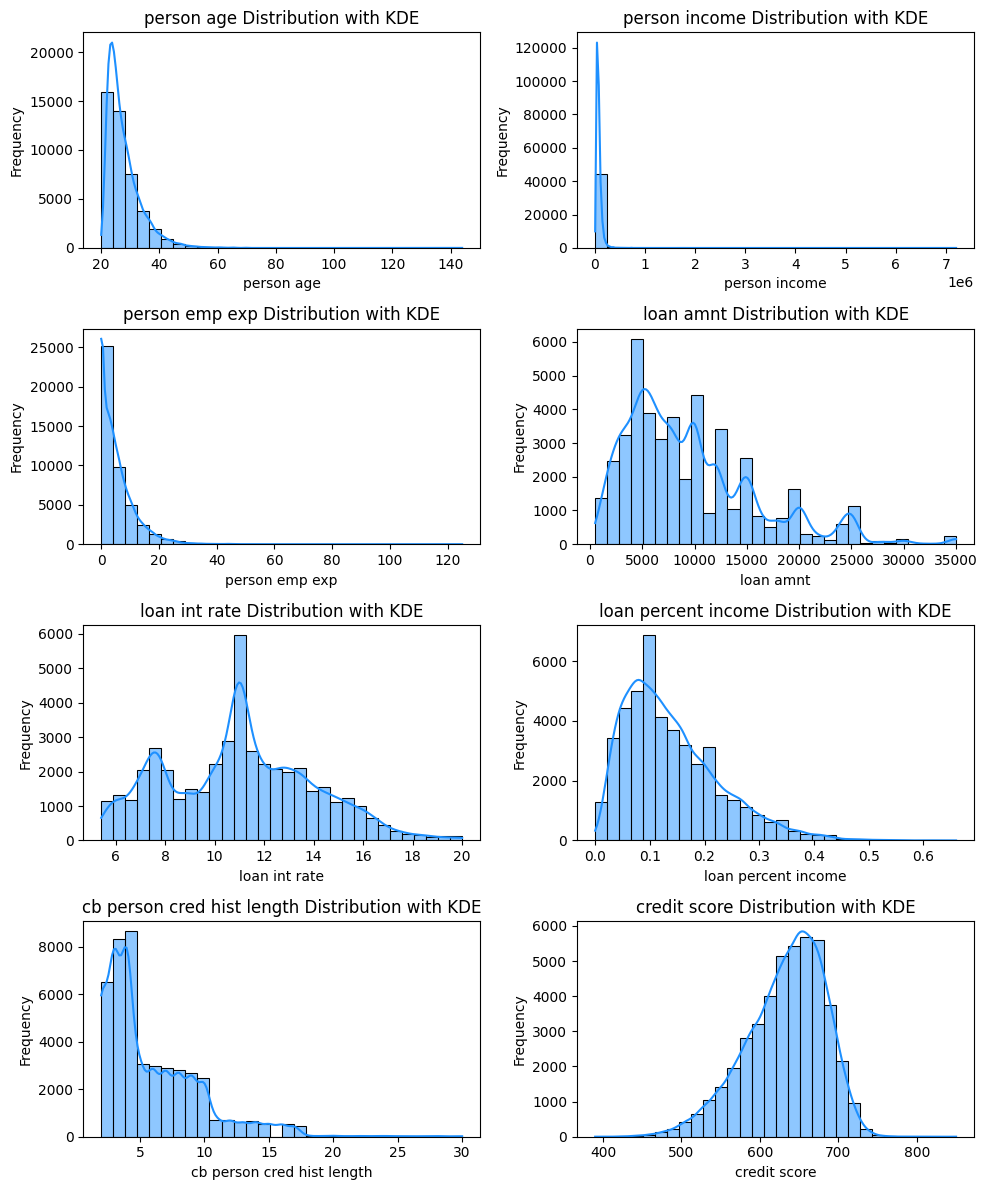

In [139]:
#perform univariate analysis for numerical columns
def univariate_analysis(data, columns):
    plt.figure(figsize=(10, 12))

    for i, column in enumerate(columns, 1):
        plt.subplot(4, 2, i)
        sns.histplot(data[column], kde=True, bins=30, color='dodgerblue')
        plt.title(f'{column.replace("_", " ")} Distribution with KDE')
        plt.xlabel(column.replace('_', ' '))
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

numerical_columns = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']
univariate_analysis(df, numerical_columns)

### Univariate Analysis for Numerical Vars -- Box Plot  

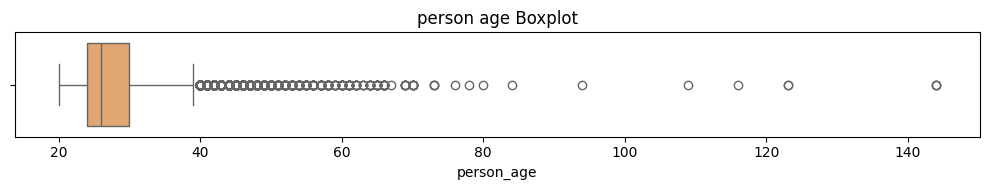


Summary Statistics for person age:
 count    45000.000000
mean        27.764178
std          6.045108
min         20.000000
25%         24.000000
50%         26.000000
75%         30.000000
max        144.000000
Name: person_age, dtype: float64


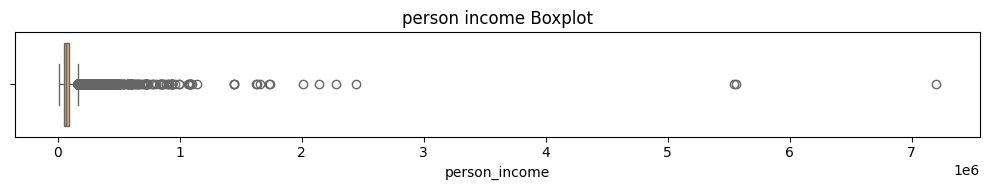


Summary Statistics for person income:
 count    4.500000e+04
mean     8.031905e+04
std      8.042250e+04
min      8.000000e+03
25%      4.720400e+04
50%      6.704800e+04
75%      9.578925e+04
max      7.200766e+06
Name: person_income, dtype: float64


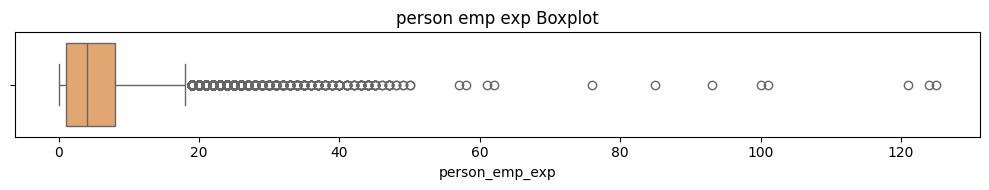


Summary Statistics for person emp exp:
 count    45000.000000
mean         5.410333
std          6.063532
min          0.000000
25%          1.000000
50%          4.000000
75%          8.000000
max        125.000000
Name: person_emp_exp, dtype: float64


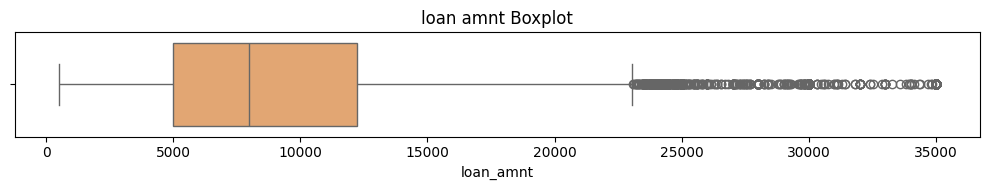


Summary Statistics for loan amnt:
 count    45000.000000
mean      9583.157556
std       6314.886691
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12237.250000
max      35000.000000
Name: loan_amnt, dtype: float64


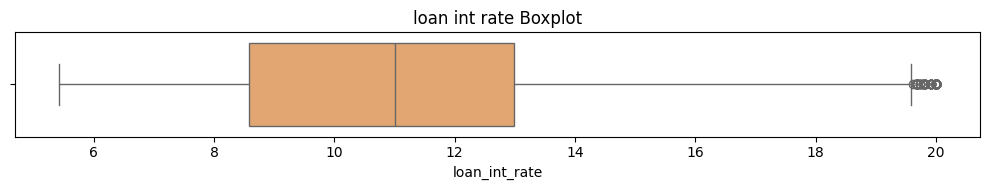


Summary Statistics for loan int rate:
 count    45000.000000
mean        11.006606
std          2.978808
min          5.420000
25%          8.590000
50%         11.010000
75%         12.990000
max         20.000000
Name: loan_int_rate, dtype: float64


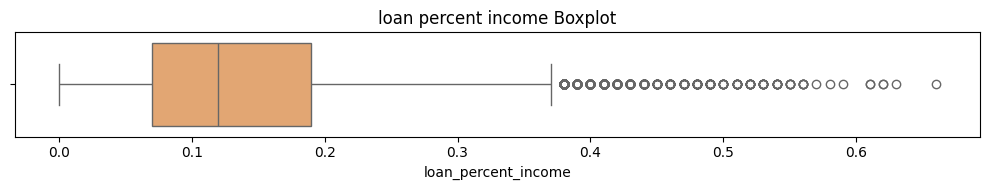


Summary Statistics for loan percent income:
 count    45000.000000
mean         0.139725
std          0.087212
min          0.000000
25%          0.070000
50%          0.120000
75%          0.190000
max          0.660000
Name: loan_percent_income, dtype: float64


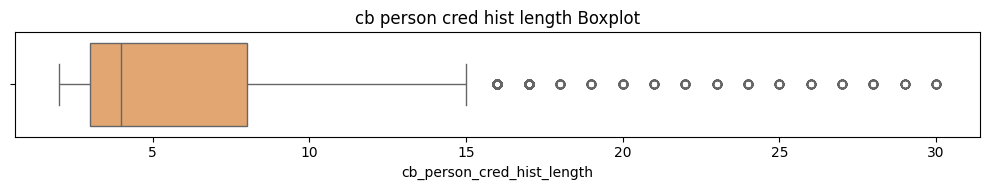


Summary Statistics for cb person cred hist length:
 count    45000.000000
mean         5.867489
std          3.879702
min          2.000000
25%          3.000000
50%          4.000000
75%          8.000000
max         30.000000
Name: cb_person_cred_hist_length, dtype: float64


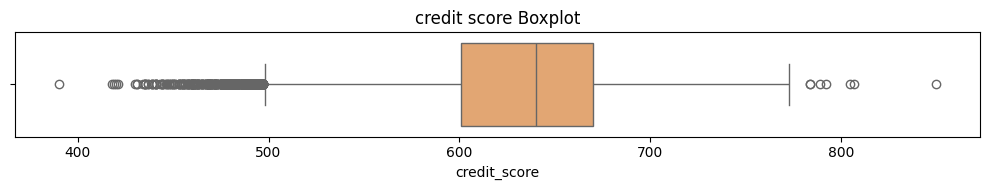


Summary Statistics for credit score:
 count    45000.000000
mean       632.608756
std         50.435865
min        390.000000
25%        601.000000
50%        640.000000
75%        670.000000
max        850.000000
Name: credit_score, dtype: float64


In [140]:
#box plot for more details
def univariate_analysis(data, column, title):
    
    plt.figure(figsize=(10, 2))
    sns.boxplot(x=data[column], color='sandybrown')
    plt.title(f'{title} Boxplot')

    plt.tight_layout()
    plt.show()

    print(f'\nSummary Statistics for {title}:\n', data[column].describe())

numerical_columns = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

for column in numerical_columns:
    univariate_analysis(df, column, column.replace('_', ' '))

**Person Age:** <br>

Ages range from 20 to 144, with the median age at 26. The high maximum value suggests a few outliers.
The interquartile range (IQR) is fairly narrow, with most values between 24 and 30. <br>

**Person Income:** <br>

The income distribution has a significant range, from 8,000 to over 7.2 million, with a median around 67,048.
The high maximum value indicates extreme outliers, which could potentially skew analyses and models. <br>

**Person Employment Experience:** <br>

Most values fall below 10 years, with the median at 4 years.
A maximum of 125 years is unusual, indicating outliers or data anomalies. Usually, we assume that a person will not have an employment experience of more than 60 years <br>

**Loan Amount:** <br>

Loan amounts vary from 500 to 35,000, with a median of 8,000.
The distribution suggests a broad spread, with some applicants requesting higher amounts near the upper limit. <br>

**Loan Interest Rate:** <br>

Interest rates range from 5.42% to 20%, with a median rate of 11.01%.
Most rates cluster within the IQR (8.59% to 12.99%), which is typical for loan interest rates. <br>

**Loan Percent Income:** <br>

This metric ranges from 0 to 0.66, with a median of 0.12, suggesting that most loans are less than 20% of the borrower’s income.
The presence of high values near 0.66 may indicate loans that represent a higher financial burden for some applicants. <br>

**Credit History Length:** <br>

Credit history spans from 2 to 30 years, with a median of 4 years.
Most applicants have shorter credit histories, likely reflecting a younger demographic. <br>

**Credit Score:** <br>

Credit scores range mostly from 400 to 800, with a couple of credits falling outside the range. Since a typical credit score range is 300-850, any credit outside of this range could be considered an outlier.  

### Univariate Analysis for Categoral Vars

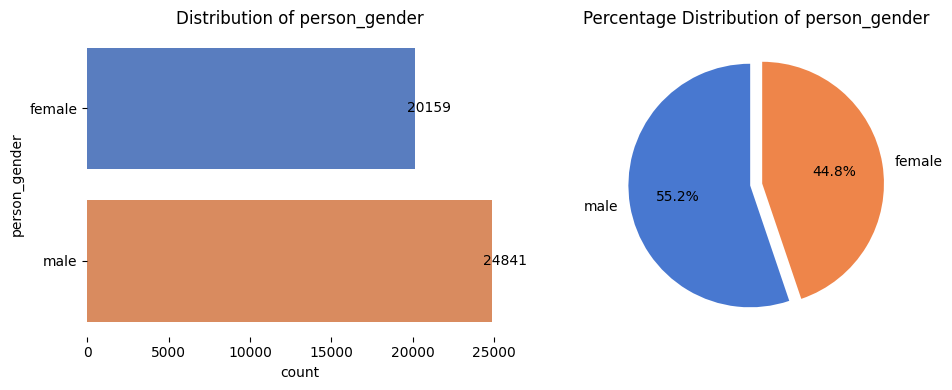

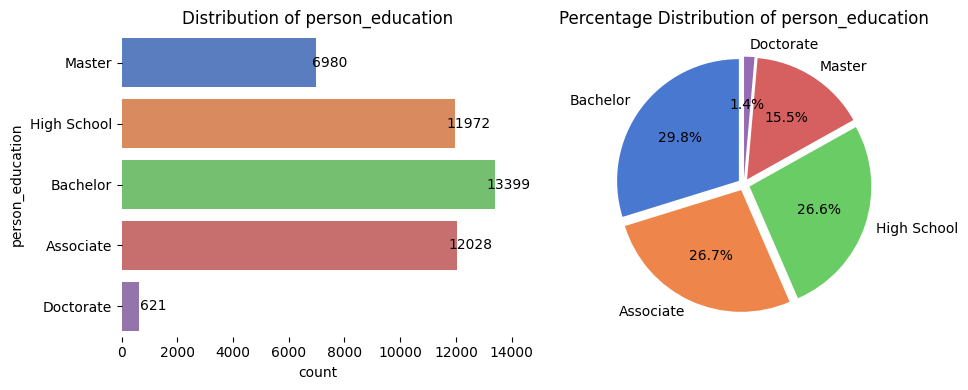

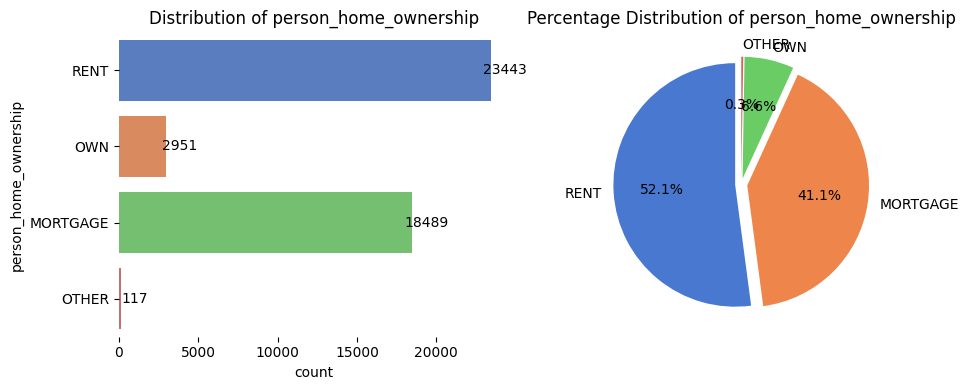

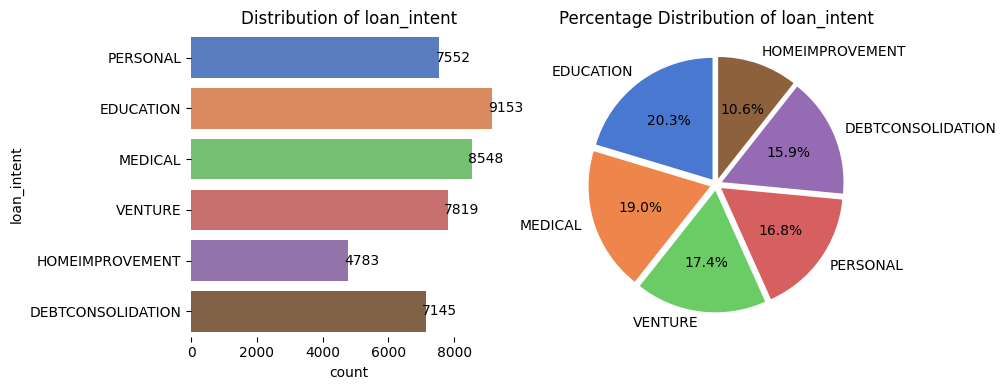

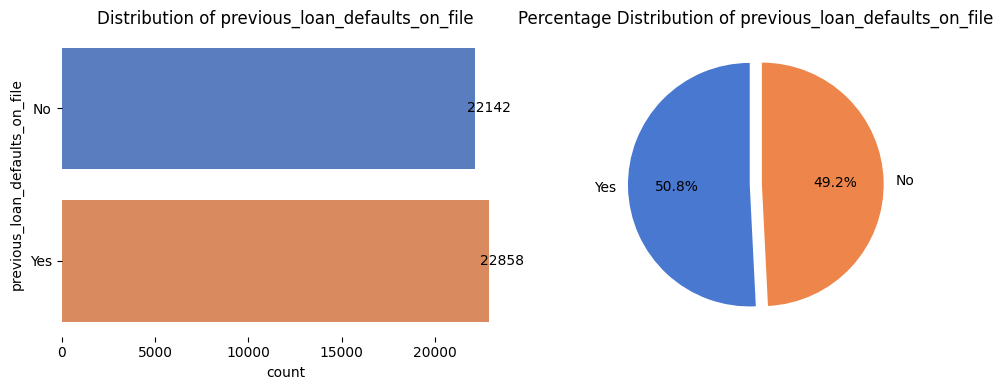

In [141]:
def plot_categorical_distribution(column_name, data=df):
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    sns.countplot(y=column_name, data=df, hue=column_name, palette='muted')
    plt.title(f'Distribution of {column_name}')

    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='center', va='center', xytext=(10, 0), textcoords='offset points')

    sns.despine(left=True, bottom=True)

    plt.subplot(1, 2, 2)
    df[column_name].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('muted'), startangle=90, explode=[0.05]*df[column_name].nunique())
    plt.title(f'Percentage Distribution of {column_name}')
    plt.ylabel('')

    plt.tight_layout()
    plt.show()

categorical_columns = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
for i in range(len(categorical_columns)):
    plot_categorical_distribution(categorical_columns[i])

Insights based on the categorical distributions: <br>

**Person Gender:** <br>

The dataset is relatively balanced in terms of gender, though there might be a slight skew toward one gender, depending on the counts.
The pie chart offers a visual summary of the proportion of each gender in the dataset. <br>

**Person Education:** <br>

Most applicants have a high school, bachelor’s, or master’s education, with fewer holding an associate or doctorate degree.
The education distribution could influence loan approval patterns, as education level often correlates with income and creditworthiness. <br>

**Person Home Ownership:** <br>

The majority of applicants either rent or own homes, with a smaller number having mortgages or classified under "other."
Applicants with different homeownership statuses may have varying financial stability, impacting their credit risk. <br>

**Loan Intent:** <br>

Loan purposes are diverse, with common intents like personal use, debt consolidation, medical expenses, and education.
The distribution reveals common reasons for seeking loans, which may impact loan approval criteria depending on risk. <br>

**Previous Loan Defaults on File:** <br>

Most applicants have no record of previous loan defaults, though there is a significant portion with defaults.
This feature can strongly influence loan decisions, as past defaults indicate higher risk.

### Multivariate Analysis

Next we will check the pairplot of our variables to see if there are any correlations between our variables.

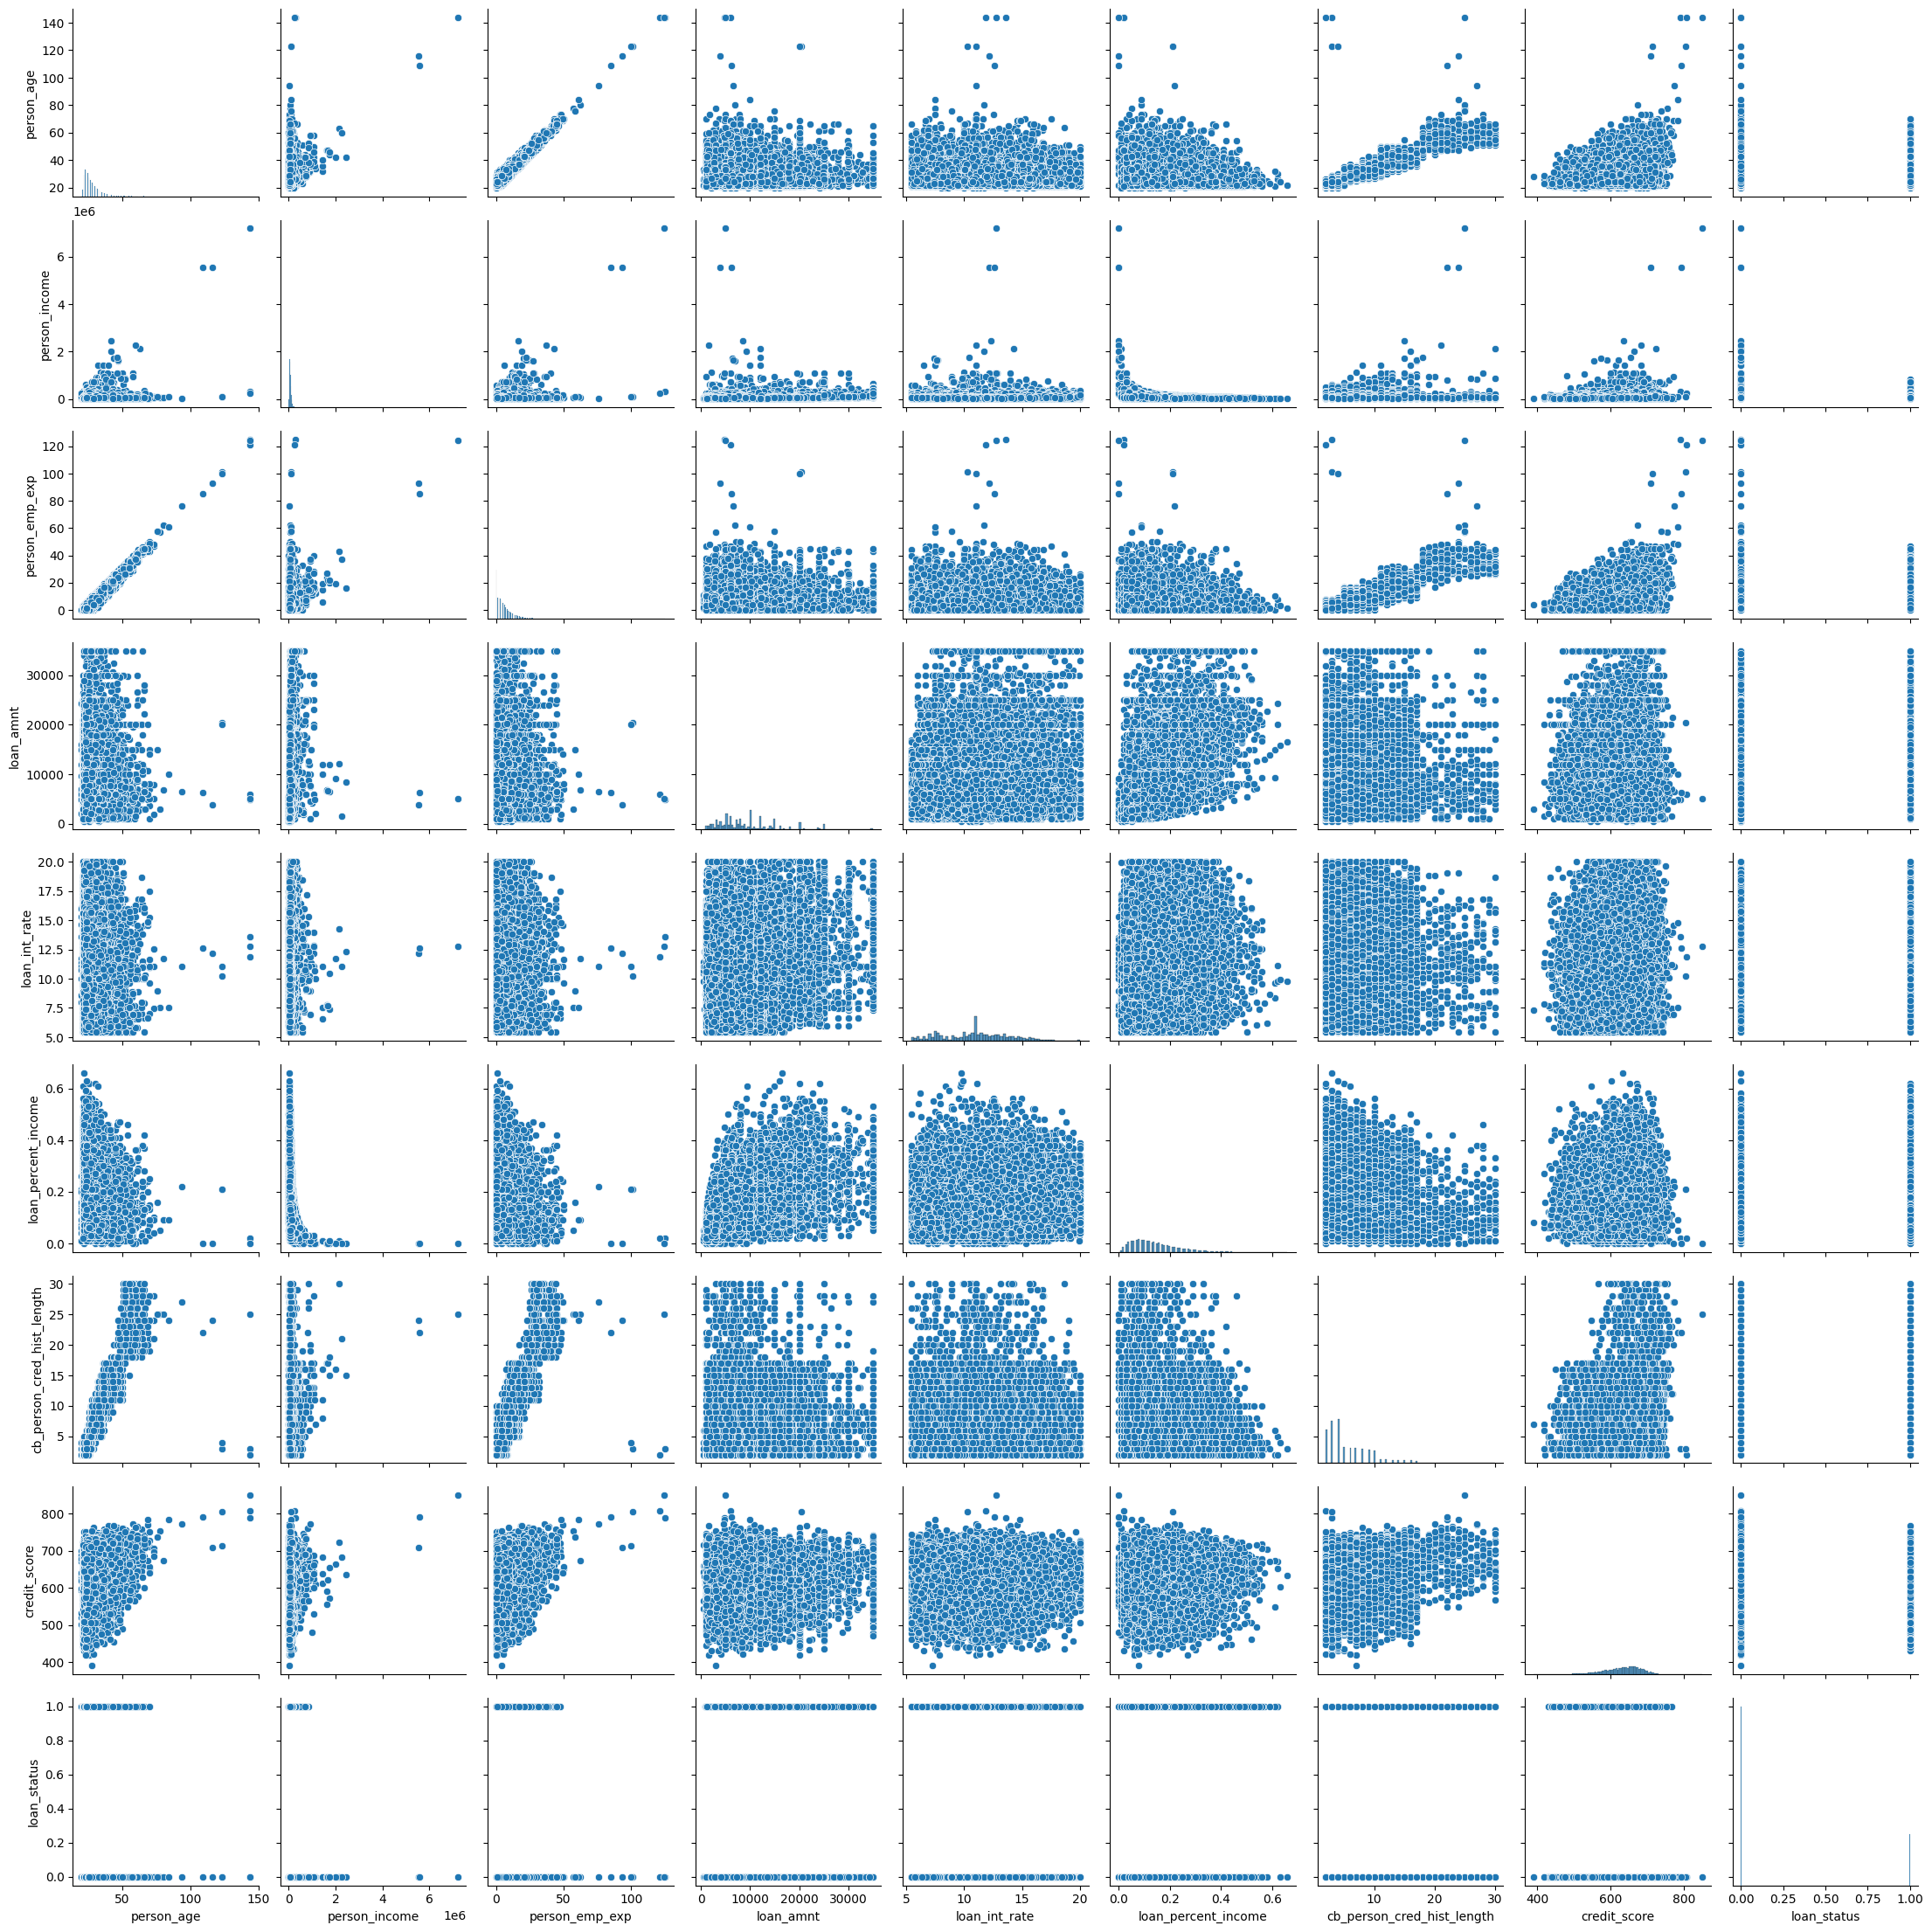

In [142]:
sns.pairplot(df)

From the pairplot, it can be observed that there is a strong positive correlation between person_age and person_emp_exp, which is understandable. Employment experience usually increases as the person grows older. Likewise, a correlation between person_age and person_cred_hist_length can be observed.

We will now quantify these correlations so that we can see how strong they are actually correlated.

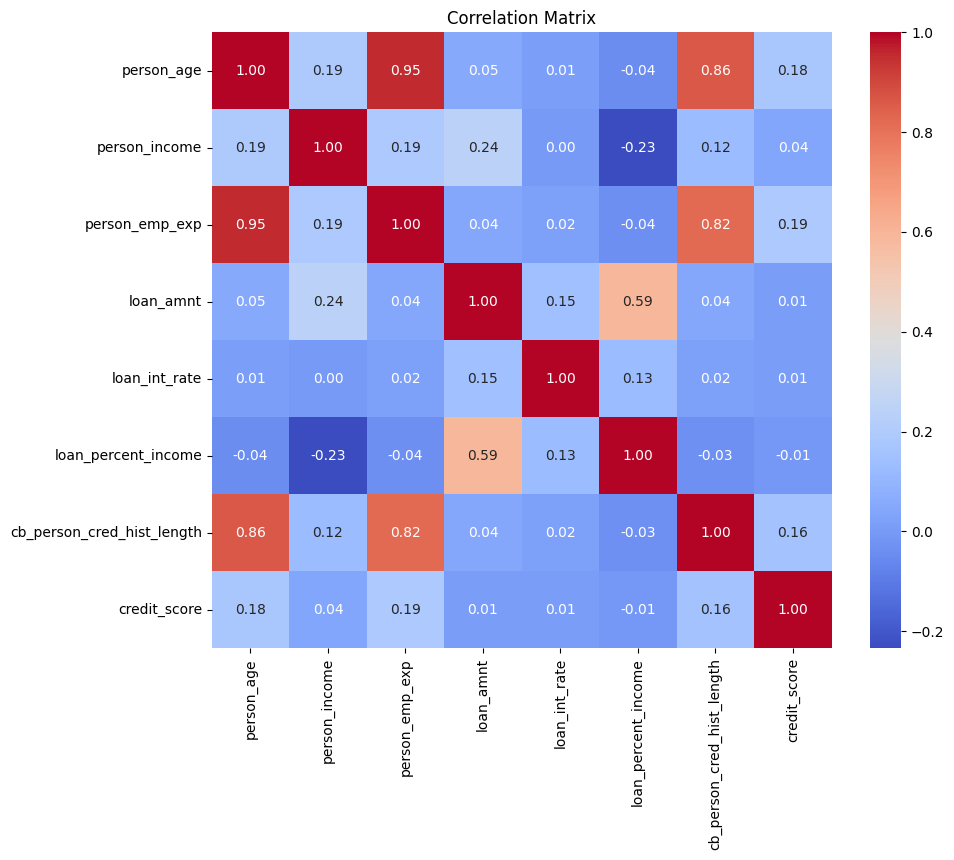

In [143]:
corr = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

From the heatmap, it can be seen clearly that there is a **strong positive correlation (0.95)** between person_age and person_emp_exp. With a correlation of 0.95, age and work experience are highly redundant. For KNN and Logistic Regression, this redundancy is problematic because both models rely on distance or margin calculations; correlated features effectively overweight the same information, which can distort distances and decision boundaries. Although Random Forests are more robust to correlated features, keeping both offers little benefit and can dilute feature importance without improving performance. From a domain perspective, years of work experience is more directly related to creditworthiness and income stability, while age may raise fairness and regulatory concerns in loan approval settings. **Removing age simplifies the feature space, reduces bias, and improves model stability without sacrificing meaningful predictive power.**

## Outlier Removal

Before we start modeling, we will remove the outliers in our data, based on the analysis we performed above

In [144]:
df= df[(df['person_age'] >= 18) & (df['person_age'] <= 80)]
df= df[(df['person_emp_exp'] >= 0) & (df['person_emp_exp'] <= 60)]
df= df[(df['credit_score'] >= 300) & (df['person_emp_exp'] <= 850)]

## Modeling

Now we start our modeling process. We start by splitting the data into **80% train data and 20% test data**. Note that instead of performing a normal train_test_split, we choose a **stratified train_test_split**. The reason is that it preserves the original class distribution of loan approval outcomes in both the training and test sets. This is especially important when the target variable is imbalanced, as it ensures that both approved and rejected loans are adequately represented. As a result, model performance is evaluated more fairly and reliably across all classifiers.

In [145]:
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_score, recall_score, make_scorer, PrecisionRecallDisplay, precision_recall_curve, average_precision_score

X = df.drop(columns=['person_age', 'loan_status'])
y = df['loan_status']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.head()

,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
35130,male,Associate,60964.0,0,OWN,3600.0,EDUCATION,6.46,0.06,3.0,564,No
42030,female,Master,34666.0,3,RENT,1000.0,MEDICAL,11.56,0.03,4.0,692,No
423,male,Bachelor,80492.0,4,RENT,24000.0,EDUCATION,6.99,0.30,3.0,602,No
29022,male,Master,46739.0,11,OWN,10000.0,HOMEIMPROVEMENT,8.94,0.21,9.0,701,No
6629,male,High School,62731.0,1,RENT,6000.0,DEBTCONSOLIDATION,5.79,0.10,4.0,624,Yes


After splitting the data, we start preprocessing the data by scaling the numerical features using the StandardScaler and converting the categorical features into one-hot encoding format using the OneHotEncoder. 

In [146]:
numerical_features = [
    'person_income',
    'person_emp_exp',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_cred_hist_length',
    'credit_score'
]

categorical_features = [
    'person_gender',
    'person_education',
    'person_home_ownership',
    'loan_intent',
    'previous_loan_defaults_on_file'
]

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(), categorical_features)
])

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [147]:
print(X_train_processed.shape)
print(X_test_processed.shape)

(35992, 26)
(8998, 26)


### Metric Selection

Now, before we start training our models, we need to consider what metric to use to evaluate the performance of our models. 

In this loan approval problem, accuracy is not an appropriate evaluation metric because the dataset is **highly imbalanced**, with around 80% of observations belonging to the “loan denied” class and only 20% to the “loan approved” class. A model that simply predicts every applicant as denied would achieve 80% accuracy while being completely useless from a business perspective, since it would approve no loans at all. Accuracy also treats all errors equally, whereas in lending, different types of errors have very different costs. **Approving a loan for a high-risk applicant (false positive) can lead to direct financial losses, while rejecting a creditworthy applicant (false negative) mainly results in missed revenue opportunities.**

For this reason, we focus on the precision and recall of class 1 (loan approved). Precision for class 1 measures how many approved loans are actually safe, directly controlling the risk of bad approvals, while recall measures how many creditworthy applicants are successfully approved, reflecting business growth. We use a **precision-weighted F1 score** for class 1 to balance these two objectives while explicitly prioritizing precision over recall. This weighted F1 score provides a single, interpretable metric that aligns model evaluation with real-world lending risk and business priorities, rather than misleading overall accuracy. The customised F1 score is defined as follows: <br/>

$$
F_\beta = (1 + \beta^2)\,\frac{P_1 \cdot R_1}{\beta^2 \cdot P_1 + R_1}
$$

where:

- $P_1$ = precision of class 1 (loan approved)
- $R_1$ = recall of class 1 (loan approved)
- $\beta$ = weighting factor ($\beta < 1$ emphasizes precision)


Here, we set **$\beta$ = 0.5** because it explicitly prioritizes precision over recall, which aligns with the risk structure of loan approval decisions. In the $F_\beta$ score, choosing $\beta$ < 1 assigns more weight to precision, and $\beta$ = 0.5 makes precision approximately twice as important as recall. This reflects the fact that approving a high-risk applicant (false positive) leads to direct financial loss, while rejecting a creditworthy applicant (false negative) mainly results in missed revenue. **By using $\beta$ = 0.5. we encourage the model to approve loans only when it is sufficiently confident, while still maintaining reasonable coverage of good borrowers.**

Apart from the precision-weighted F1 score we defined above, **PR-AUC** is also an appropriate metric for evaluating model performance because it focuses on precision and recall for the positive class, making it especially appropriate for our highly imbalanced loan approval dataset. Unlike threshold-dependent metrics such as F1, **PR-AUC assesses the model’s ability to rank approved loans above rejected ones across all decision thresholds. This provides a robust, threshold-independent view of performance that complements the precision-weighted F1 score.**

After consideration, we decided to apply the **precision-weighted F1 score for model selection** and **PR-AUC for evaluating the overall performance of our models on test data.**

In [148]:
def customised_f1_score(y_true, y_pred, beta=0.5):
    
    precision_approved = precision_score(
        y_true,
        y_pred,
        pos_label=1,
        zero_division=0
    )

    recall_approved = recall_score(
        y_true,
        y_pred,
        pos_label=1,
        zero_division=0
    )

    beta_sq = beta ** 2

    if precision_approved + recall_approved == 0:
        return 0.0

    return (1 + beta_sq) * (precision_approved * recall_approved) / (beta_sq * precision_approved + recall_approved)

custom_scorer = make_scorer(customised_f1_score)

## Stratified K-fold cross-validation for GridSearch
cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

### Modeling using KNN

First, we start with the simplest model - KNN. We use GridSearch with predefined hyperparameters to find the optimal combination of hyperparameters. Then, we train the model using the optimal hyperparameters. Then, we test the best model on the test set to evaluate its performance. 

In [149]:
knn_param_grid = {
    "n_neighbors": [3, 5, 7, 9, 11, 13, 15],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"]
}

knn_grid = GridSearchCV(
    KNeighborsClassifier(),
    knn_param_grid,
    cv=cv,
    scoring=custom_scorer
)

knn_grid.fit(X_train_processed, y_train)
print("Best parameters:", knn_grid.best_params_)

Best parameters: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      6998
           1       0.84      0.72      0.77      2000

    accuracy                           0.91      8998
   macro avg       0.88      0.84      0.86      8998
weighted avg       0.90      0.91      0.90      8998



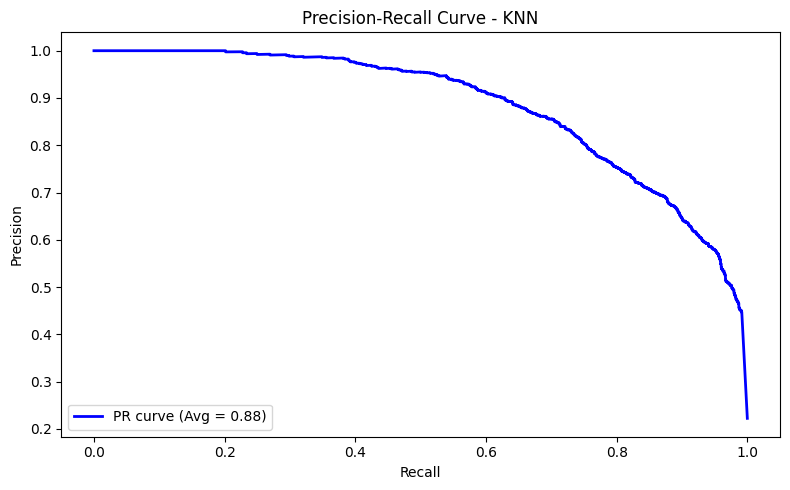

In [150]:
best_knn = knn_grid.best_estimator_

y_pred = best_knn.predict(X_test_processed)
y_proba = best_knn.predict_proba(X_test_processed)[:, 1]
knn_score = customised_score(y_test, y_pred)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Precision-Recall Curve
fig, ax = plt.subplots(figsize=(8, 5))
precision, recall, _ = precision_recall_curve(y_test, y_proba)
knn_avg_precision = average_precision_score(y_test, y_proba)
ax.plot(recall, precision, color='blue', lw=2, label=f'PR curve (Avg = {knn_avg_precision:.2f})')
ax.set_title('Precision-Recall Curve - KNN')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")

plt.tight_layout()
plt.show()

Our best KNN model gives an average of PR-AUC of **0.88**.

### Modeling using Logistic Regression

Next, we repeat the same steps for training and evaluating the Logistic Regression model.

In [151]:
logr_param_grid = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l1", "l2"],
    "class_weight": [None, "balanced"]
}

logr_grid = GridSearchCV(
    LogisticRegression(max_iter=5000, 
                       solver="saga",  # supports both L1, L2 regularization
                       random_state=42), 
    logr_param_grid,
    scoring=custom_scorer,
    cv=cv,
    n_jobs=-1,
    verbose=1
)

logr_grid.fit(X_train_processed, y_train)
print("Best parameters:", logr_grid.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters: {'C': 0.01, 'class_weight': None, 'penalty': 'l2'}



Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      6998
           1       0.79      0.73      0.76      2000

    accuracy                           0.90      8998
   macro avg       0.86      0.84      0.85      8998
weighted avg       0.89      0.90      0.89      8998



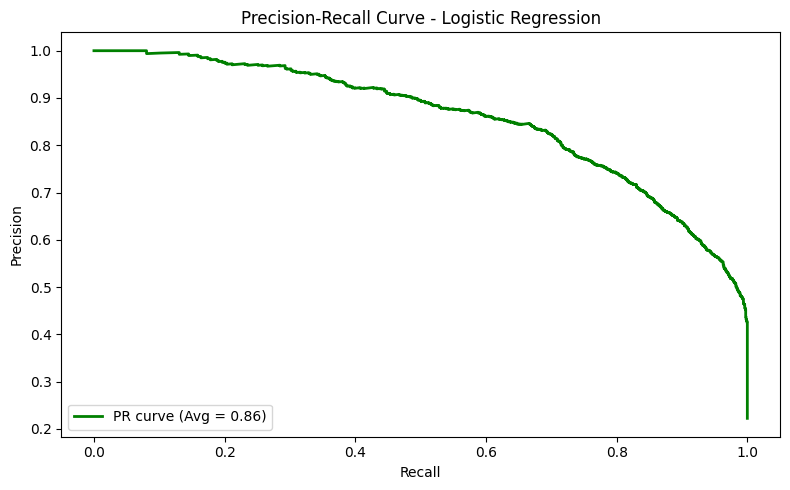

In [152]:
best_logr = logr_grid.best_estimator_

y_pred = best_logr.predict(X_test_processed)
y_proba = best_logr.predict_proba(X_test_processed)[:, 1]
logr_score = customised_score(y_test, y_pred)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Precision-Recall Curve
fig, ax = plt.subplots(figsize=(8, 5))
precision, recall, _ = precision_recall_curve(y_test, y_proba)
logr_avg_precision = average_precision_score(y_test, y_proba)
ax.plot(recall, precision, color='green', lw=2, label=f'PR curve (Avg = {logr_avg_precision:.2f})')
ax.set_title('Precision-Recall Curve - Logistic Regression')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")

plt.tight_layout()
plt.show()

Our Logistic Regression model gives an average score of **0.86.**

### Modeling using Random Forest

Lastly, we will use Random Forest for loan approval prediction. We assume that Random Forest will perform better on the data becasue it works generally well with mixed feature types and is resistant to outliers and scaling. 

In [153]:
rf_param_grid = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [2, 5, 10, 20],
    'min_samples_split': [2, 5, 10, 20],
    'max_features': ['sqrt', 'log2']
}

rf_grid = GridSearchCV(
    RandomForestClassifier(),
    rf_param_grid,
    scoring=custom_scorer,  
    cv=cv,
    n_jobs=-1,
    verbose=1
)

rf_grid.fit(X_train_processed, y_train)
print("Best parameters:", rf_grid.best_params_)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
Best parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 200}



Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      6998
           1       0.91      0.72      0.81      2000

    accuracy                           0.92      8998
   macro avg       0.92      0.85      0.88      8998
weighted avg       0.92      0.92      0.92      8998



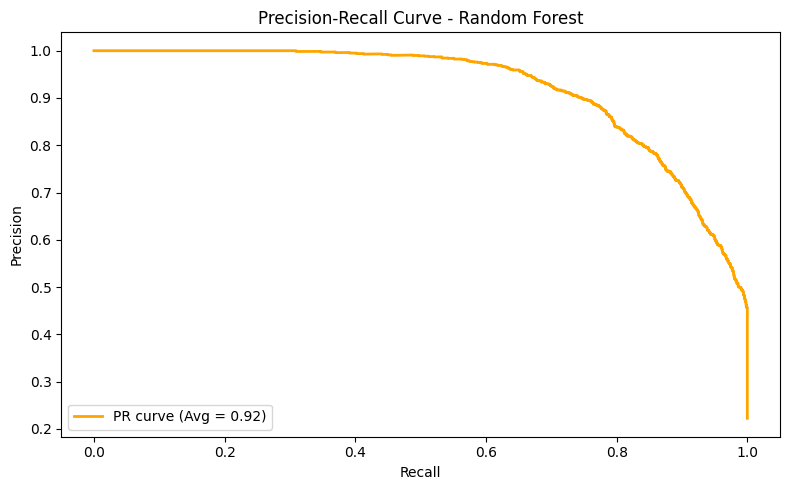

In [154]:
best_rf = rf_grid.best_estimator_

y_pred = best_rf.predict(X_test_processed)
y_proba = best_rf.predict_proba(X_test_processed)[:, 1]
rf_score = customised_score(y_test, y_pred)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Precision-Recall Curve
fig, ax = plt.subplots(figsize=(8, 5))
precision, recall, _ = precision_recall_curve(y_test, y_proba)
rf_avg_precision = average_precision_score(y_test, y_proba)
ax.plot(recall, precision, color='orange', lw=2, label=f'PR curve (Avg = {rf_avg_precision:.2f})')
ax.set_title('Precision-Recall Curve - Random Forest')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")

plt.tight_layout()
plt.show()

The best Random Forest model generates a highest average score of **0.92** among all three models.

## Summary and Conclusion

Finally, let's plot the results we obtained for our models.

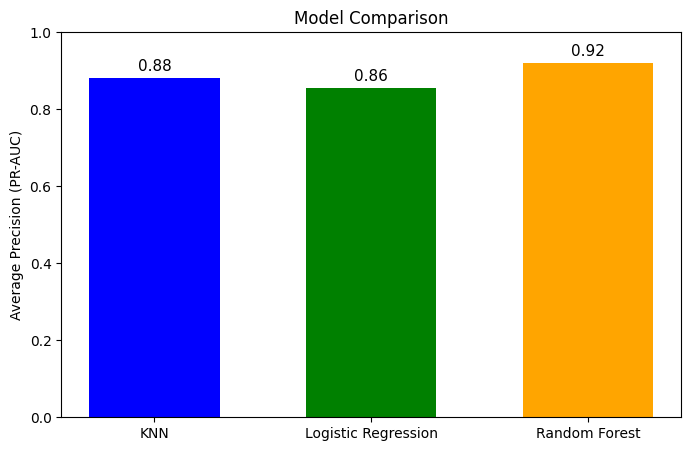

In [155]:
models = ['KNN', 'Logistic Regression', 'Random Forest']
avg_precisions = [knn_avg_precision, logr_avg_precision, rf_avg_precision]

plt.figure(figsize=(8, 5))
bars = plt.bar(models, avg_precisions, color=['blue', 'green', 'orange'], width=0.6)
plt.ylim(0, 1) 
plt.ylabel('Average Precision (PR-AUC)')
plt.title('Model Comparison')

# Add labels on top of bars
for bar, score in zip(bars, avg_precisions):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{score:.2f}', ha='center', va='bottom', fontsize=11)

plt.show()

In this project, we addressed the loan approval classification problem under a highly imbalanced setting, where approved loans (the positive class) represent a minority but carry greater business importance. To align model development with real-world objectives, we adopted a two-stage evaluation strategy. During model selection, a customised F1 score (with β = 0.5) was used to prioritise precision over recall, reflecting the higher cost associated with incorrectly approving risky loans. This ensured that the selected models were optimised according to business-driven decision criteria rather than generic accuracy-based metrics.

For final model evaluation, we employed Average Precision (PR-AUC) on the test set to assess each model’s ability to rank approved loans ahead of rejected ones across all possible decision thresholds. PR-AUC is particularly suitable for imbalanced datasets, as it focuses exclusively on the precision–recall trade-off for the positive class and provides a threshold-independent measure of performance. This approach offers a more comprehensive view of model quality than single-threshold metrics alone.

**The results show that all three models performed strongly, with KNN, Logistic Regression, and Random Forest achieving Average Precision scores of 0.88, 0.86, and 0.92, respectively.** Among them, the Random Forest model demonstrated the best overall ranking performance, indicating a superior ability to distinguish truly creditworthy applicants from rejected ones. Logistic Regression, while slightly weaker in PR-AUC, remains attractive due to its interpretability and stability, which are important considerations in regulated financial contexts. Overall, the results highlight the importance of combining business-aligned model selection metrics with robust, imbalance-aware evaluation metrics to make reliable and actionable decisions in loan approval systems.